# Introduction

The National Longitudinal Survey of Youth 1997-2011 dataset is one of the most important databases available to social scientists working with US data. 

It allows scientists to look at the determinants of earnings as well as educational attainment and has incredible relevance for government policy. It can also shed light on politically sensitive issues like how different educational attainment and salaries are for people of different ethnicity, sex, and other factors. When we have a better understanding how these variables affect education and earnings we can also formulate more suitable government policies. 

<center><img src=https://i.imgur.com/cxBpQ3I.png height=400></center>


### Upgrade Plotly

In [210]:
#%pip install --upgrade plotly
#pip install -U scikit-learn

###  Import Statements


In [211]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Notebook Presentation

In [212]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data



In [213]:
df_data = pd.read_csv('NLSY97_subset.csv')

### Understand the Dataset

Have a look at the file entitled `NLSY97_Variable_Names_and_Descriptions.csv`. 

---------------------------

    :Key Variables:  
      1. S           Years of schooling (highest grade completed as of 2011)
      2. EXP         Total out-of-school work experience (years) as of the 2011 interview.
      3. EARNINGS    Current hourly earnings in $ reported at the 2011 interview

# Preliminary Data Exploration 🔎

**Challenge**

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [214]:
print(f'df_data.shape = {df_data.shape}')
print(f'df_data columns: {df_data.columns}')

df_data.shape = (2000, 96)
df_data columns: Index(['ID', 'EARNINGS', 'S', 'EXP', 'FEMALE', 'MALE', 'BYEAR', 'AGE',
       'AGEMBTH', 'HHINC97', 'POVRAT97', 'HHBMBF', 'HHBMOF', 'HHOMBF',
       'HHBMONLY', 'HHBFONLY', 'HHOTHER', 'MSA97NO', 'MSA97NCC', 'MSA97CC',
       'MSA97NK', 'ETHBLACK', 'ETHHISP', 'ETHWHITE', 'EDUCPROF', 'EDUCPHD',
       'EDUCMAST', 'EDUCBA', 'EDUCAA', 'EDUCHSD', 'EDUCGED', 'EDUCDO',
       'PRMONM', 'PRMONF', 'PRMSTYUN', 'PRMSTYPE', 'PRMSTYAN', 'PRMSTYAE',
       'PRFSTYUN', 'PRFSTYPE', 'PRFSTYAN', 'PRFSTYAE', 'SINGLE', 'MARRIED',
       'COHABIT', 'OTHSING', 'FAITHN', 'FAITHP', 'FAITHC', 'FAITHJ', 'FAITHO',
       'FAITHM', 'ASVABAR', 'ASVABWK', 'ASVABPC', 'ASVABMK', 'ASVABNO',
       'ASVABCS', 'ASVABC', 'ASVABC4', 'VERBAL', 'ASVABMV', 'HEIGHT',
       'WEIGHT04', 'WEIGHT11', 'SF', 'SM', 'SFR', 'SMR', 'SIBLINGS', 'REG97NE',
       'REG97NC', 'REG97S', 'REG97W', 'RS97RURL', 'RS97URBN', 'RS97UNKN',
       'JOBS', 'HOURS', 'TENURE', 'CATGOV', 'CATPRI', 'CATNPO', '

In [215]:
print(f'NaN cells count: {df_data.isna().any().sum()}')
print(f'Duplicated rows count: {df_data.duplicated().sum()}')

NaN cells count: 16
Duplicated rows count: 513


## Data Cleaning - Check for Missing Values and Duplicates

Find and remove any duplicate rows.

In [216]:
df_clean = df_data.dropna()
df_clean = df_clean.drop_duplicates()

In [217]:
df_clean.shape

(492, 96)

## Descriptive Statistics

In [218]:
df_clean.describe()

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
count,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,...,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00
mean,"3,530.57",19.13,14.89,5.92,0.49,0.51,"1,982.98",28.02,26.74,"66,732.78",...,0.75,0.13,0.31,0.35,0.21,0.05,0.54,0.41,0.00,0.00
std,"1,948.08",11.54,2.69,2.51,0.50,0.50,0.82,0.82,4.71,"44,951.87",...,0.44,0.33,0.46,0.48,0.41,0.22,0.50,0.49,0.05,0.00
min,28.00,2.13,8.00,0.00,0.00,0.00,"1,982.00",27.00,17.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,833.25",12.00,12.00,4.24,0.00,0.00,"1,982.00",27.00,24.00,"40,725.00",...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"3,470.50",16.00,16.00,5.75,0.00,1.00,"1,983.00",28.00,26.00,"58,027.50",...,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
75%,"5,186.75",24.04,17.00,7.75,1.00,1.00,"1,984.00",29.00,30.00,"77,432.50",...,1.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00
max,"8,978.00",123.08,20.00,12.33,1.00,1.00,"1,984.00",29.00,41.00,"246,474.00",...,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00


In [219]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 0 to 1989
Data columns (total 96 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        492 non-null    int64  
 1   EARNINGS  492 non-null    float64
 2   S         492 non-null    int64  
 3   EXP       492 non-null    float64
 4   FEMALE    492 non-null    int64  
 5   MALE      492 non-null    int64  
 6   BYEAR     492 non-null    int64  
 7   AGE       492 non-null    int64  
 8   AGEMBTH   492 non-null    float64
 9   HHINC97   492 non-null    float64
 10  POVRAT97  492 non-null    float64
 11  HHBMBF    492 non-null    int64  
 12  HHBMOF    492 non-null    int64  
 13  HHOMBF    492 non-null    int64  
 14  HHBMONLY  492 non-null    int64  
 15  HHBFONLY  492 non-null    int64  
 16  HHOTHER   492 non-null    int64  
 17  MSA97NO   492 non-null    int64  
 18  MSA97NCC  492 non-null    int64  
 19  MSA97CC   492 non-null    int64  
 20  MSA97NK   492 non-null    int64

## Visualise the Features

### Work Related Paramters

In [220]:
# EARNINGS,C,Current hourly earnings in $ reported at the 2011 interview
# HOURS,C,"Usual number of hours worked per week, 2011 interview"
# TENURE,C,Tenure (years) with current employer at the 2011 interview
# EXP,C,Total out-of-school work experience (years) as of the 2011 interview.
# COLLBARG,D,"Pay set by collective bargaining, 2011"
# JOBS,C,"Number of jobs, as of 2011 interview"

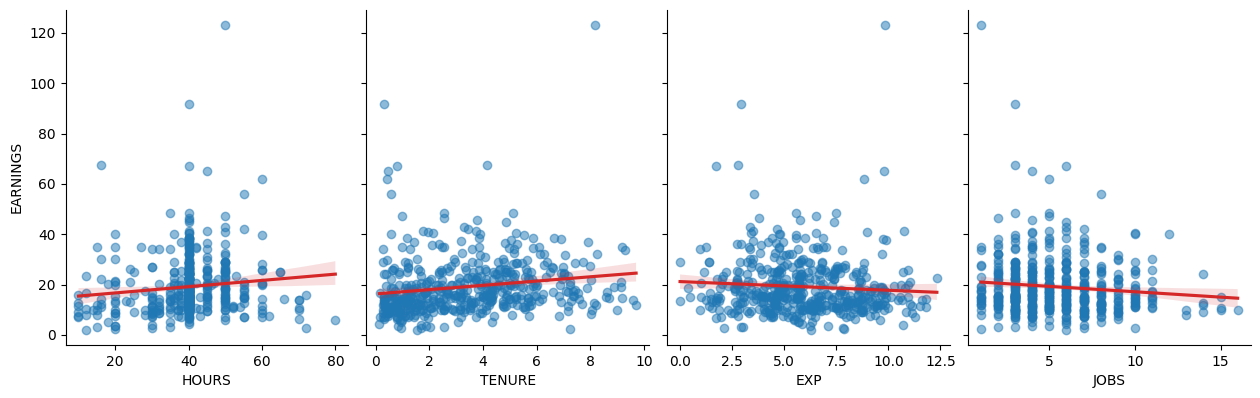

In [221]:
sns.pairplot(df_clean, x_vars=["HOURS", "TENURE", "EXP", "JOBS"], y_vars=["EARNINGS"],
             height=4, aspect=.8, kind="reg", plot_kws={'line_kws': {'color': 'C3'}, 'scatter_kws': {'alpha': 0.5}})
plt.show()

### Education vs Earnings

#### Years of Schooling

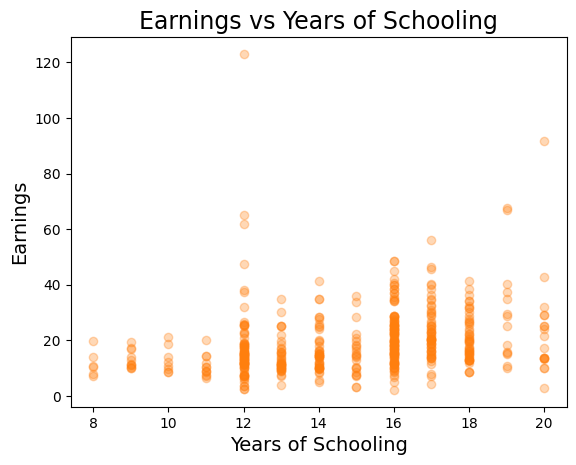

In [605]:
plt.scatter(x=df_clean['S'], y=df_clean['EARNINGS'], c='C1', alpha=0.3)
plt.title(f'Earnings vs Years of Schooling', fontsize=17)
plt.xlabel('Years of Schooling', fontsize=14)
plt.ylabel('Earnings', fontsize=14)
plt.show()

#### Earning vs Highest degrees

In [223]:
# Highest educational qualification:
# EDUCPROF,D,Professional degree
# EDUCPHD,D,Doctorate
# EDUCMAST,D,Master's degree
# EDUCBA,D,Bachelor's degree
# EDUCAA,D,Associate's (two-year college) degree
# EDUCHSD,D,High school diploma
# EDUCGED,D,General Educational Development certificate (HSD equivalence)
# EDUCDO,D,High school drop-out

pd.options.mode.chained_assignment = None
# Collect related data
df_edu = df_clean[['EARNINGS', 'EDUCPROF', 'EDUCPHD', 'EDUCMAST',
                   'EDUCBA', 'EDUCAA', 'EDUCHSD', 'EDUCGED', 'EDUCDO']]
df_edu.rename(columns={
    'EARNINGS': 'Earnings',
    'EDUCPROF': 'Professional degree',
    'EDUCPHD': 'Doctorate',
    'EDUCMAST': 'Master\'s degree',
    'EDUCBA': 'Bachelor\'s degree',
    'EDUCAA': 'Associate\'s degree',
    'EDUCHSD': 'High school diploma',
    'EDUCGED': 'HSD equivalence',
    'EDUCDO': 'High school drop-out'
}, inplace=True)

edu_columns = df_edu.columns.array.tolist()
edu_columns.remove('Earnings')

# Convert data
for index, row in df_edu.iterrows():
    for column in edu_columns:
        if row[column] != 0:
            df_edu.loc[index, 'Education'] = column


We can see Bachelor's degree has higher earnings then high school diploma in general. But there is no significance difference between Bachelor's degree and higher degrees.

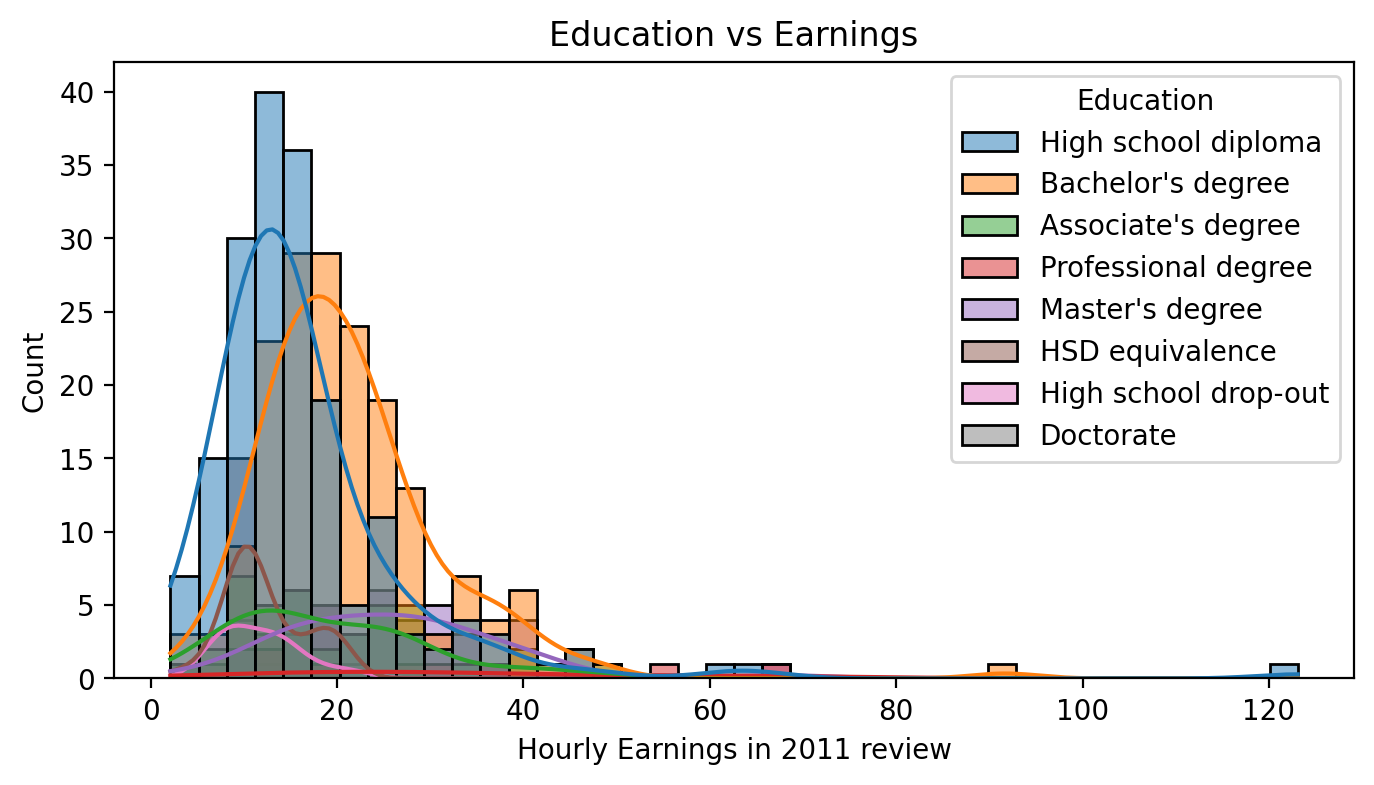

In [224]:
plt.figure(figsize=(8, 4), dpi=200)
ax = sns.histplot(data=df_edu, x="Earnings", hue="Education", kde=True)
ax.set(ylabel='Count',
       xlabel='Hourly Earnings in 2011 review',
       title='Education vs Earnings')
plt.show()


### Gender vs Earnings

In [225]:
# Personal variables,Variable Type,Description
# FEMALE,D,"Sex of respondent (0 if male, 1 if female)"
# MALE,D,"Sex of respondent (1 if male, 0 if female)"

df_gender = df_clean[['EARNINGS', 'FEMALE', 'MALE']]
df_gender.rename(columns={
    'EARNINGS': 'Earnings',
    'FEMALE': 'Female',
    'MALE': 'Male',
}, inplace=True)

gender_columns = ['Female', 'Male']

# Convert data
for index, row in df_gender.iterrows():
    for column in gender_columns:
        if row[column] != 0:
            df_gender.loc[index, 'Gender'] = column


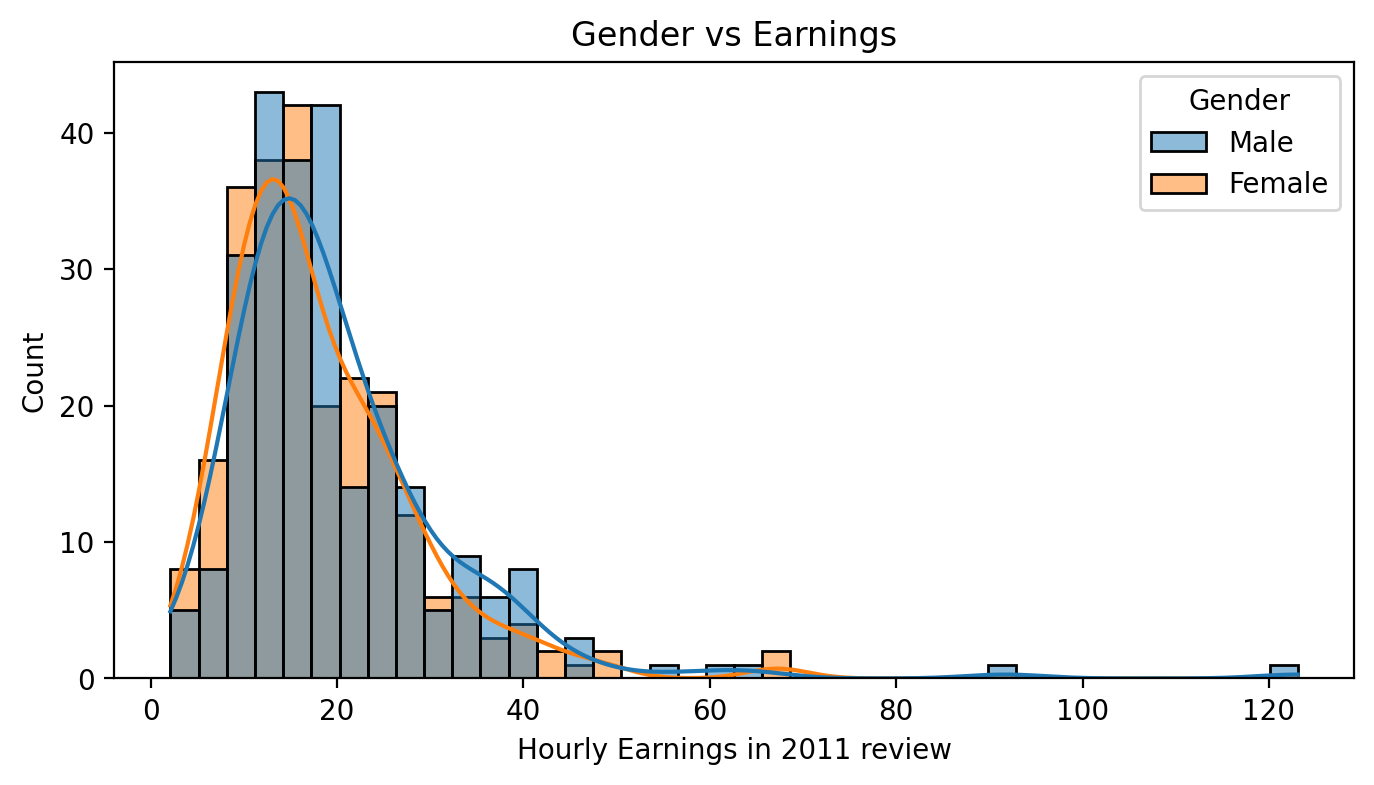

In [226]:
plt.figure(figsize=(8, 4), dpi=200)
ax = sns.histplot(data=df_gender, x="Earnings", hue="Gender", kde=True)
ax.set(ylabel='Count',
       xlabel='Hourly Earnings in 2011 review',
       title='Gender vs Earnings')
plt.show()


### ASVAB Score vs Earnings

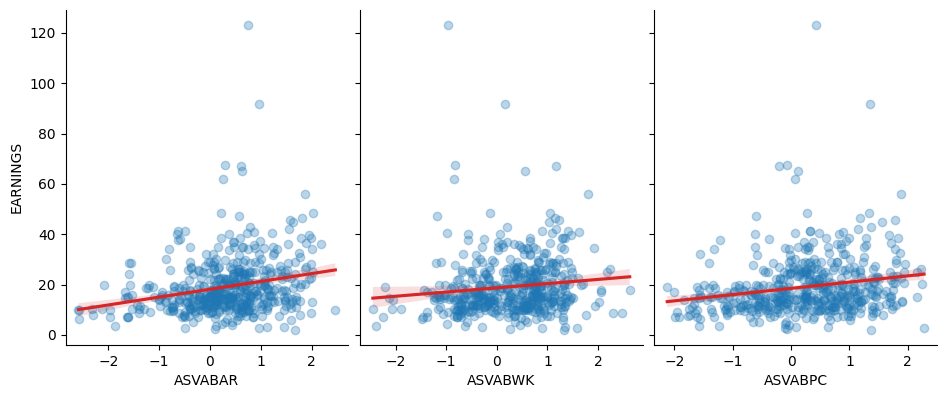

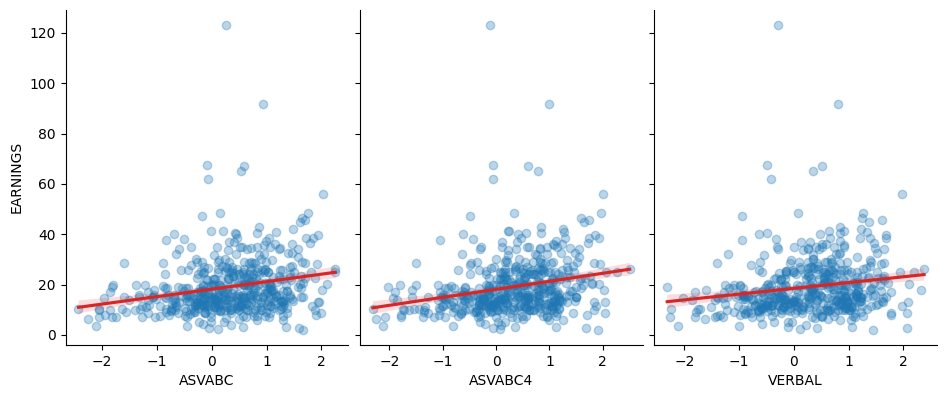

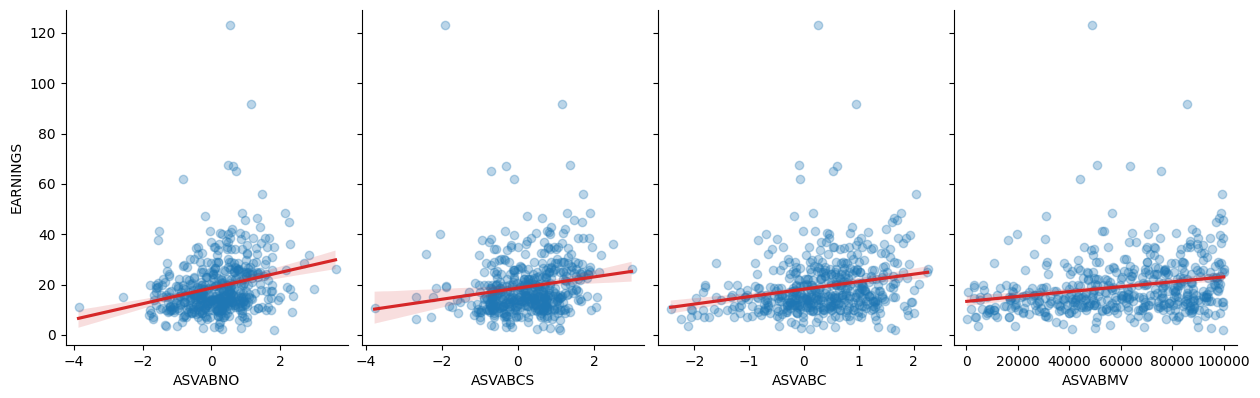

In [604]:
# Scaled score on a component of the ASVAB battery
# ASVABAR,C,Arithmetic reasoning
# ASVABWK,C,Word knowledge
# ASVABPC,C,Paragraph comprehension
# ASVABNO,C,Numerical operations (speed test)
# ASVABCS,C,Coding speed (speed test)
# ASVABC,C,"Composite of ASVABAR (with double weight), ASVABWK and ASVABPC"
# ASVABC4,C,"Composite of ASVABAR, ASVABWK, ASVABPC and math knowledge score"
# VERBAL,C,Composite of ASVABWK and ASVABPC
# ASVABMV,C,NLSY constructed math verbal composite
sns.pairplot(df_clean, x_vars=["ASVABAR", "ASVABWK", "ASVABPC"], y_vars=["EARNINGS"],
             height=4, aspect=.8, kind="reg", plot_kws={'line_kws': {'color': 'C3'}, 'scatter_kws': {'alpha': 0.3}})
sns.pairplot(df_clean, x_vars=["ASVABC", "ASVABC4", "VERBAL"], y_vars=["EARNINGS"],
             height=4, aspect=.8, kind="reg", plot_kws={'line_kws': {'color': 'C3'}, 'scatter_kws': {'alpha': 0.3}})
sns.pairplot(df_clean, x_vars=["ASVABNO", "ASVABCS", "ASVABC", "ASVABMV"], y_vars=["EARNINGS"],
             height=4, aspect=.8, kind="reg", plot_kws={'line_kws': {'color': 'C3'}, 'scatter_kws': {'alpha': 0.3}})
plt.show()


# Split Training & Test Dataset

We *can't* use all the entries in our dataset to train our model. Keep 20% of the data for later as a testing dataset (out-of-sample data).  

In [593]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_clean, df_clean['EARNINGS'], test_size=0.2, random_state=10)

# Simple Linear Regression

Only use the years of schooling to predict earnings. Use sklearn to run the regression on the training dataset. How high is the r-squared for the regression on the training data? 

In [594]:
# 1. S           Years of schooling (highest grade completed as of 2011)
# 2. EXP         Total out-of-school work experience (years) as of the 2011 interview.
# 3. EARNINGS    Current hourly earnings in $ reported at the 2011 interview
X_train_S = np.array(X_train['S']).reshape(-1,1)
X_test_S = np.array(X_test['S']).reshape(-1,1)

In [596]:
from sklearn.linear_model import LinearRegression
reg_s = LinearRegression()
reg_s.fit(X_train_S, y_train)
rsquared_s = reg_s.score(X_test_S, y_test)
print(f'R-Squared of the training data: {rsquared_s:.2}')

R-Squared of the training data: 0.16


### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative). 

Interpret the regression. How many extra dollars can one expect to earn for an additional year of schooling?

In [597]:
#Theta zero
print(f"theta_zero={reg_s.intercept_}")
#Theta one
print(f"theta_one={reg_s.coef_}")

theta_zero=2.194919222341529
theta_one=[1.1280176]


In [598]:
print(f'$ {reg_s.coef_[0]:.3} extra dollars for an additional year of schooling')


$ 1.13 extra dollars for an additional year of schooling


### Analyse the Estimated Values & Regression Residuals

How good our regression is also depends on the residuals - the difference between the model's predictions ( 𝑦̂ 𝑖 ) and the true values ( 𝑦𝑖 ) inside y_train. Do you see any patterns in the distribution of the residuals?

In [617]:
predict_values_s = reg_s.predict(X_train_S)
residuals_s = (y_train - predict_values_s)

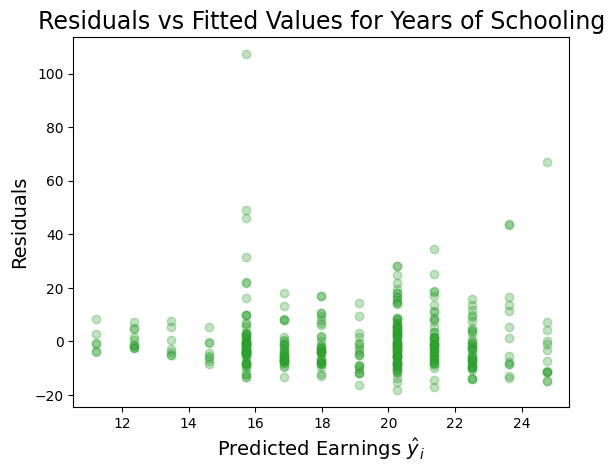

In [618]:
# Residuals vs Predicted values
plt.scatter(x=predict_values_s, y=residuals_s, c='C2', alpha=0.3)
plt.title('Residuals vs Fitted Values for Years of Schooling', fontsize=17)
plt.xlabel('Predicted Earnings $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

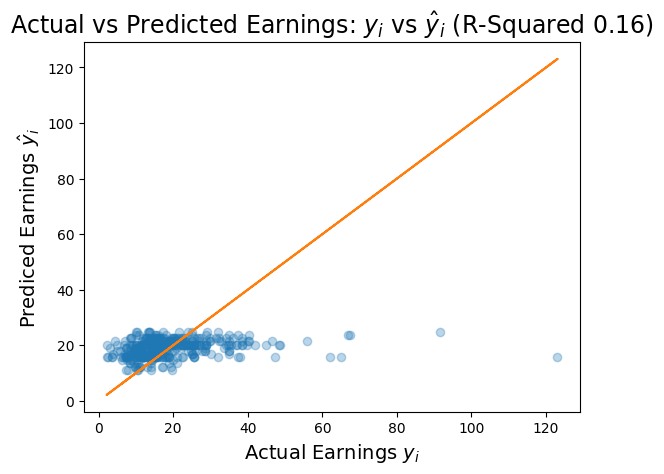

In [635]:
plt.scatter(x=y_train, y=predict_values_s, alpha=0.3)
plt.plot(y_train, y_train, color='C1')
plt.title(f'Actual vs Predicted Earnings: $y _i$ vs $\hat y_i$ (R-Squared {rsquared_s:.2})', fontsize=17)
plt.xlabel('Actual Earnings $y _i$', fontsize=14)
plt.ylabel('Prediced Earnings $\hat y _i$', fontsize=14)
plt.show()

Since r-squared value is low and there are pattern in residuals distribution, this model has a systematic bias and a poor prediction.

# Multivariable Regression

Now use both years of schooling and the years work experience to predict earnings. How high is the r-squared for the regression on the training data? 

In [614]:
X_train_2 = np.array(X_train[['S','EXP']])
X_test_2 = np.array(X_test[['S','EXP']])

In [615]:
reg_2 = LinearRegression()
reg_2.fit(X_train_2, y_train)
rsquared_2 = reg_2.score(X_train_2, y_train)

print(f'Training data r-squared: {rsquared_2:.2}')

Training data r-squared: 0.085


### Evaluate the Coefficients of the Model

In [616]:
#Theta zero
print(f"theta_zero={reg_2.intercept_}")
#Theta one
print(f"theta_one={reg_2.coef_}")

theta_zero=-11.1199236237122
theta_one=[1.66850097 0.90050307]


### Analyse the Estimated Values & Regression Residuals

In [620]:
predict_values_2 = reg_2.predict(X_train_2)
residuals_2 = (y_train - predict_values_2)

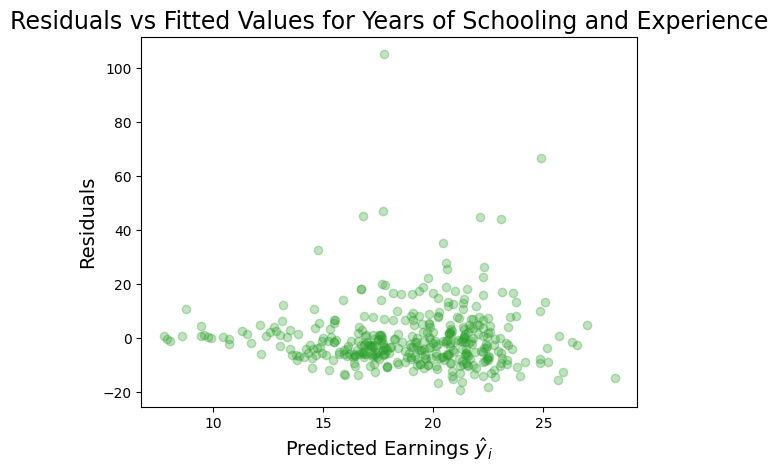

In [622]:
# Residuals vs Predicted values of S and EXP
plt.scatter(x=predict_values_2, y=residuals_2, c='C2', alpha=0.3)
plt.title('Residuals vs Fitted Values for Years of Schooling and Experience', fontsize=17)
plt.xlabel('Predicted Earnings $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

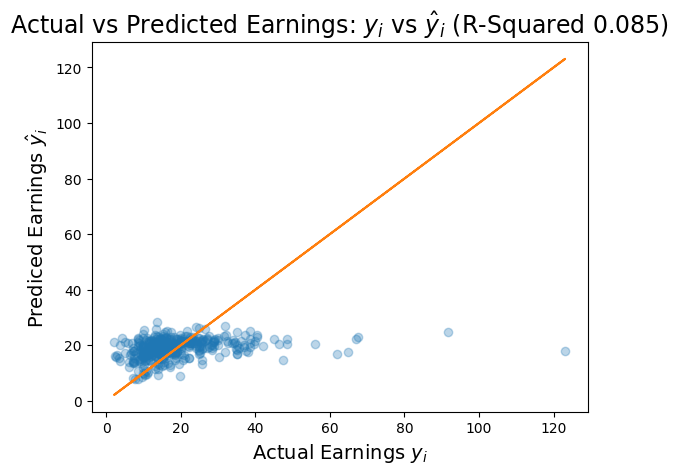

In [634]:
plt.scatter(x=y_train, y=predict_values_2, alpha=0.3)
plt.plot(y_train, y_train, color='C1')
plt.title(f'Actual vs Predicted Earnings: $y _i$ vs $\hat y_i$ (R-Squared {rsquared_2:.2})', fontsize=17)
plt.xlabel('Actual Earnings $y _i$', fontsize=14)
plt.ylabel('Prediced Earnings $\hat y _i$', fontsize=14)
plt.show()

Using years of schooling and experience for regression model, we have a better result in resuiduals distribution. But the R-squared value is still low.

# Use Your Model to Make a Prediction

How much can someone with a bachelors degree (12 + 4) years of schooling and 5 years work experience expect to earn in 2011?

In [637]:
print(f'The estimated earnings is ${reg_2.predict([[16, 5]])[0]:.4} (predicted with S and EXP only)')

The estimated earnings is $20.08 (predicted with S and EXP only)


# Experiment and Investigate Further

Which other features could you consider adding to further improve the regression to better predict earnings? 

Try to add more features into consideration, columns are selected base on if I can get a higher r-squared value...

In [638]:
reg3_columns = ['S', 'EDUCHSD', 'MARRIED', 'COHABIT', 'FAITHJ', 'ASVABPC',
                'ASVABCS', 'ASVABMV', 'FAITHP', 'MSA97NO', 'RS97RURL', 'HHBMBF', 'PRMONM', 'PRMONF',
                'EXP', 'COLLBARG', 'CATGOV', 'CATNPO', 'MSA11NCC', 'MSA11NK', 'URBAN']
X_train_3 = np.array(X_train[reg3_columns])
X_test_3 = np.array(X_test[reg3_columns])
# R-Squared
reg_3 = LinearRegression()
reg_3.fit(X_train_3, y_train)
rsquared_3 = reg_3.score(X_test_3, y_test)
print(f'R-Squared of the training data: {rsquared_3}')
# Theta zero
print(f"theta_zero={reg_3.intercept_}")
# Theta one
print(f"theta_one={reg_3.coef_}")


R-Squared of the training data: 0.3816795287072844
theta_zero=-6.085807075838325
theta_one=[ 1.18975736e+00 -1.30779922e+00  1.83115863e+00 -4.18161513e-01
  3.40570872e+00 -4.36935178e-01  8.32070821e-01  4.39989078e-05
  4.18441580e-01 -2.67018317e+00 -8.17548596e-01  1.70805218e+00
 -2.72391145e-01  1.79277871e-01  7.94141865e-01  5.75971720e+00
 -3.11036101e+00 -3.55948927e+00  5.47203708e-02 -3.24556041e+00
  2.45324151e-01]


In [640]:
predict_values_3 = reg_2.predict(X_train_2)
residuals_3 = (y_train - predict_values_3)

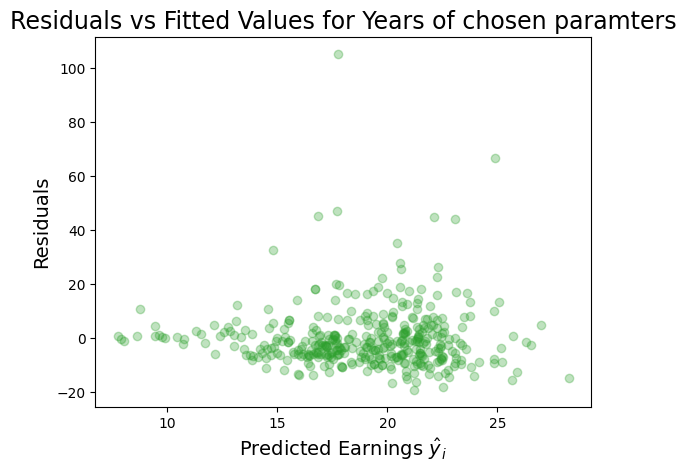

In [641]:
# Residuals vs Predicted values
plt.scatter(x=predict_values_3, y=residuals_3, c='C2', alpha=0.3)
plt.title('Residuals vs Fitted Values for Years of chosen paramters', fontsize=17)
plt.xlabel('Predicted Earnings $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

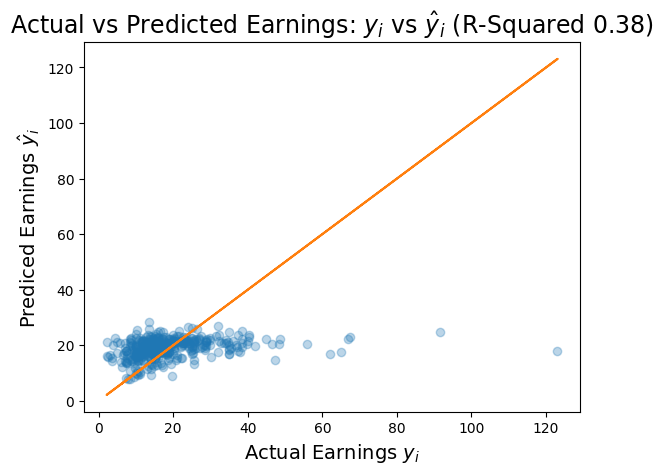

In [656]:
plt.scatter(x=y_train, y=predict_values_3, alpha=0.3)
plt.plot(y_train, y_train, color='C1')
plt.title(f'Actual vs Predicted Earnings: $y _i$ vs $\hat y_i$ (R-Squared {rsquared_3:.2})', fontsize=17)
plt.xlabel('Actual Earnings $y _i$', fontsize=14)
plt.ylabel('Prediced Earnings $\hat y _i$', fontsize=14)
plt.show()

Adding more features improves a little, but not much...

### Regression using Log Earnings

Try to transform the data to see if there's a better candidcate for the model

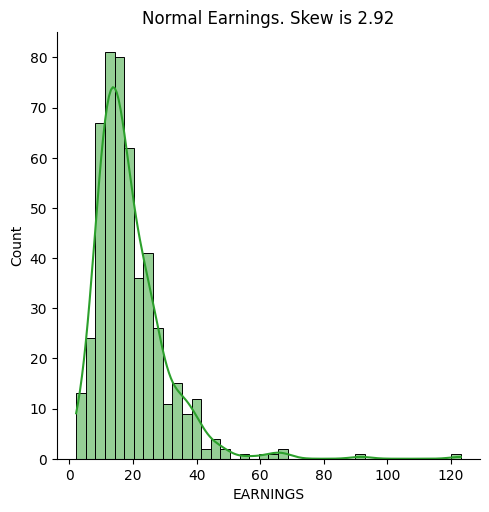

In [643]:
tgt_skew = df_clean['EARNINGS'].skew()
sns.displot(df_clean['EARNINGS'], kde='kde', color='C2')
plt.title(f'Normal Earnings. Skew is {tgt_skew:.3}')
plt.show()

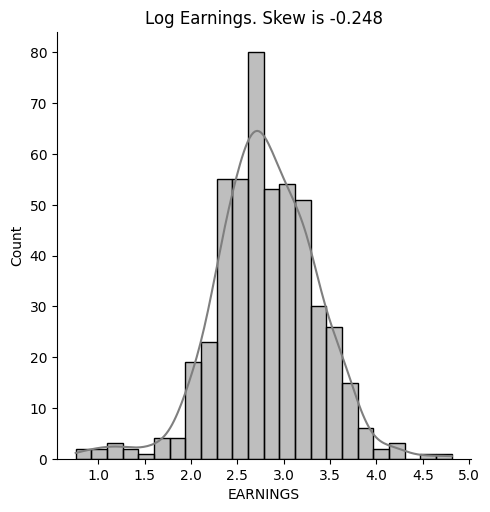

In [646]:
y_log = np.log(df_clean['EARNINGS'])
sns.displot(y_log, kde=True, color='C7')
plt.title(f'Log Earnings. Skew is {y_log.skew():.3}')
plt.show()

Distribution for log earnings has a skew closer to 0. It may fit better for the model.

In [586]:
new_target = np.log(df_clean['EARNINGS'])
features = df_clean.drop('EARNINGS', axis=1)

X_train, X_test, log_y_train, log_y_test = train_test_split(features,
                                                            new_target,
                                                            test_size=0.2,
                                                            random_state=10)

reg3_columns = ['MALE', 'ETHBLACK', 'ETHHISP', 'ETHWHITE', 'AGE', 'S', 'EDUCPROF', 'EDUCPHD', 'EDUCMAST', 'EDUCBA', 'EDUCAA', 'EDUCHSD', 'MARRIED', 'COHABIT', 'ASVABAR', 'ASVABWK', 'ASVABNO', 'ASVABCS', 'ASVABC', 'ASVABC4', 'VERBAL', 'ASVABMV',
                'FAITHN', 'FAITHC', 'FAITHP', 'SM', 'SF', 'SMR', 'SFR', 'SIBLINGS', 'AGEMBTH', 'MSA97NO', 'MSA97NCC', 'RS97RURL', 'REG97NE', 'REG97NC', 'REG97W',
                'HHBMBF', 'HHBMOF', 'HHINC97', 'POVRAT97', 'PRMONF', 'PRMSTYUN', 'PRMSTYPE', 'PRMSTYAE', 'PRFSTYUN', 'PRFSTYPE', 'PRFSTYAE', 'HOURS', 'TENURE', 'EXP', 'COLLBARG', 'JOBS',
                'CATGOV', 'CATPRI', 'CATSE', 'CATNPO', 'MSA11NO', 'MSA11NCC', 'MSA11CC', 'URBAN', 'REGNE', 'REGNC', 'REGW', 'REGS']

X_train_log = np.array(X_train[reg3_columns])
X_test_log = np.array(X_test[reg3_columns])

log_regr = LinearRegression()
log_regr.fit(X_train_log, log_y_train)
log_rsquared = log_regr.score(X_train_log, log_y_train)

log_predictions = log_regr.predict(X_train_log)
log_residuals = (log_y_train - log_predictions)

print(f'Training data r-squared: {log_rsquared:.2}')
# Theta zero
print(f"theta_zero={reg_3.intercept_}")
# Theta
print(f"theta_one={reg_3.coef_}")


Training data r-squared: 0.45
theta_zero=-6.085807075838325
theta_one=[ 1.18975736e+00 -1.30779922e+00  1.83115863e+00 -4.18161513e-01
  3.40570872e+00 -4.36935178e-01  8.32070821e-01  4.39989078e-05
  4.18441580e-01 -2.67018317e+00 -8.17548596e-01  1.70805218e+00
 -2.72391145e-01  1.79277871e-01  7.94141865e-01  5.75971720e+00
 -3.11036101e+00 -3.55948927e+00  5.47203708e-02 -3.24556041e+00
  2.45324151e-01]


By using log earnings and selected features, the r-squared value is improved to 0.45

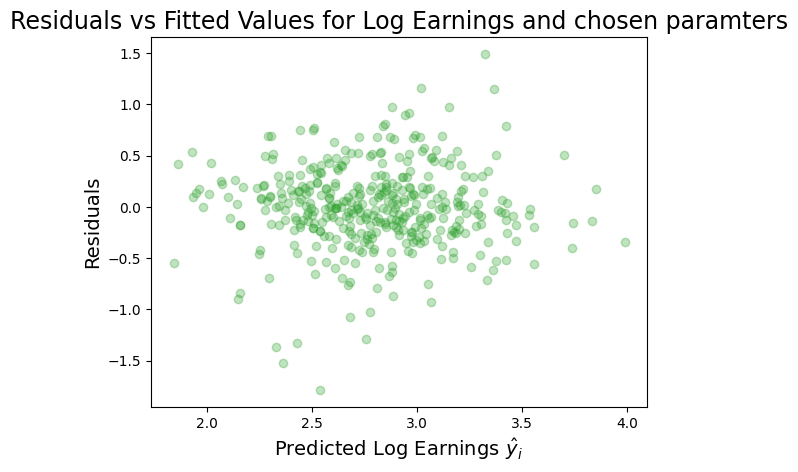

In [654]:
# Residuals vs Predicted values (Log earnings)
plt.scatter(x=log_predictions, y=log_residuals, c='C2', alpha=0.3)
plt.title('Residuals vs Fitted Values for Log Earnings and chosen paramters', fontsize=17)
plt.xlabel('Predicted Log Earnings $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

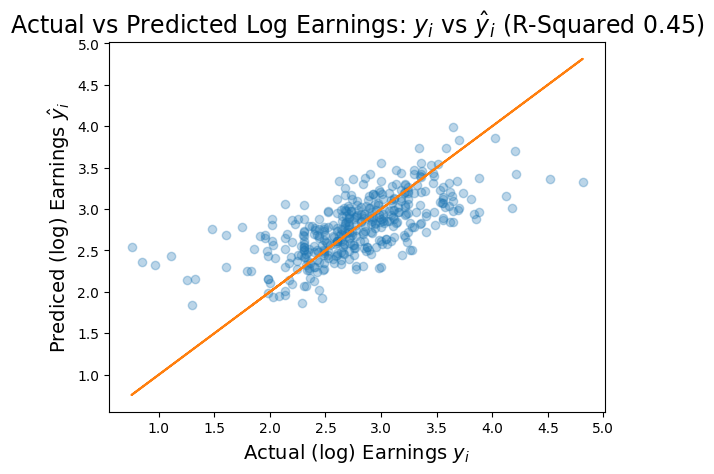

In [655]:
plt.scatter(x=log_y_train, y=log_predictions, alpha=0.3)
plt.plot(log_y_train, log_y_train, color='C1')
plt.title(f'Actual vs Predicted Log Earnings: $y _i$ vs $\hat y_i$ (R-Squared {log_rsquared:.2})', fontsize=17)
plt.xlabel('Actual (log) Earnings $y _i$', fontsize=14)
plt.ylabel('Prediced (log) Earnings $\hat y _i$', fontsize=14)
plt.show()

The graph above show that the regression on log earnings provide a better predition in the middle range of earnings.

### Check residual distribution

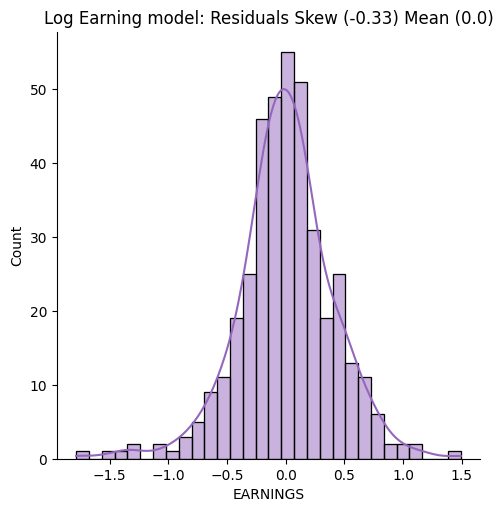

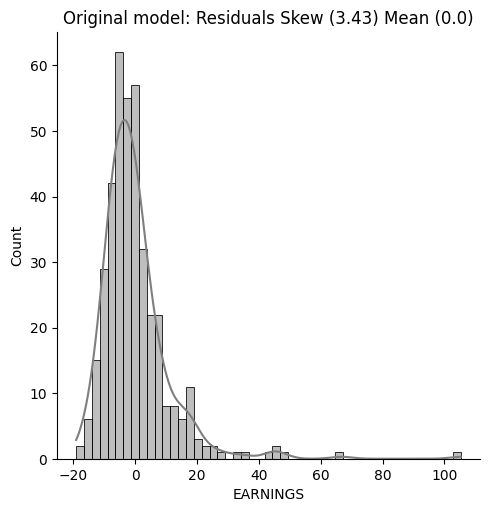

In [658]:
# Distribution of Residuals (log earnings) - checking for normality
log_resid_mean = round(log_residuals.mean(), 2)
log_resid_skew = round(log_residuals.skew(), 2)

sns.displot(log_residuals, kde=True, color='C4')
plt.title(f'Log Earning model: Residuals Skew ({log_resid_skew}) Mean ({log_resid_mean})')
plt.show()

resid_mean = round(residuals_3.mean(), 2)
resid_skew = round(residuals_3.skew(), 2)
sns.displot(residuals_3, kde=True, color='C7')
plt.title(f'Original model: Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

Both models have mean value 0, Log model has a smaller skew value -0.33 which indicates that Log model is better then the original one.